In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
# import openpyxl

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Job skills to list 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\MateuszSz\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 785741/785741 [00:10<00:00, 74400.93 examples/s]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

### Filter for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US

job_title_short                                     job_title  \
36        Data Analyst                                  Data Analyst   
68        Data Analyst                     Sr. Research Data Analyst   
73        Data Analyst   Entry level / Systems Data Analyst (Remote)   
79        Data Analyst                    Data Analyst/Report Writer   
93        Data Analyst  IT Finance / TBM Data Analyst - Remote | WFH   
...                ...                                           ...   
785603    Data Analyst                           Junior Data Analyst   
785626    Data Analyst                    Data Acquisition Associate   
785685    Data Analyst                                  Data Analyst   
785703    Data Analyst       Data Analyst - CRYPTOGRAPHY - Full-time   
785705    Data Analyst     Expert Business Data Analyst - Now Hiring   

            job_location               job_via job_schedule_type  \
36        Des Moines, IA       via Trabajo.org         Full-time   
68         Baltimore, MD      via ZipRecruiter         Full-time   
73              Anywhere          via LinkedIn        Contractor   
79            Austin, TX  via Jobs Trabajo.org         Full-time   
93              Anywhere          via LinkedIn         Full-time   
...                  ...                   ...               ...   
785603  Santa Monica, CA       via Trabajo.org         Full-time   
785626     Tarrytown, NY       via Trabajo.org         Full-time   
785685  Indianapolis, IN       via Trabajo.org         Full-time   
785703          Anywhere          via Snagajob         Full-time   
785705       Oakland, CA          via Snagajob         Full-time   

        job_work_from_home            search_location     job_posted_date  \
36                   False    Illinois, United States 2023-11-06 13:01:22   
68                   False    New York, United States 2023-03-24 13:01:00   
73                    True    Illinois, United States 2023-06-16 13:18:22   
79                   False       Texas, United States 2023-08-07 13:18:27   
93                    True    New York, United States 2023-06-10 13:00:05   
...                    ...                        ...                 ...   
785603               False  California, United States 2023-09-12 06:00:50   
785626               False    New York, United States 2023-10-29 06:01:29   
785685               False    Illinois, United States 2023-07-16 06:01:27   
785703                True       Texas, United States 2023-01-28 06:02:55   
785705               False  California, United States 2023-01-09 06:00:25   

        job_no_degree_mention  job_health_insurance    job_country  \
36                      False                  True  United States   
68                      False                 False  United States   
73                       True                  True  United States   
79                       True                 False  United States   
93                      False                 False  United States   
...                       ...                   ...            ...   
785603                  False                 False  United States   
785626                  False                 False  United States   
785685                   True                 False  United States   
785703                   True                 False  United States   
785705                  False                 False  United States   

       salary_rate  salary_year_avg  salary_hour_avg  \
36            None              NaN              NaN   
68            None              NaN              NaN   
73            None              NaN              NaN   
79            None              NaN              NaN   
93            None              NaN              NaN   
...            ...              ...              ...   
785603        None              NaN              NaN   
785626        None              NaN              NaN   
785685        None              NaN              NaN   

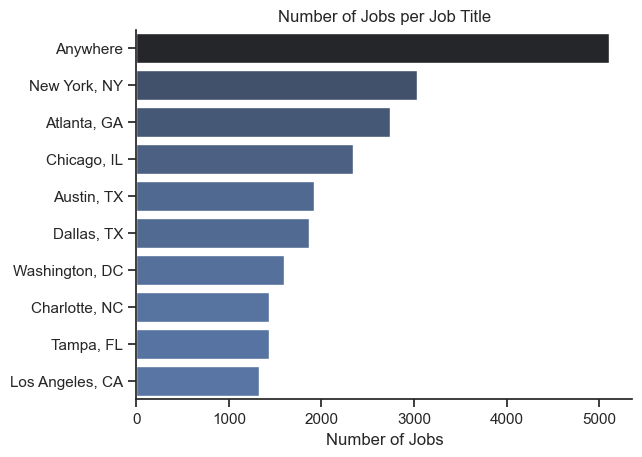

In [17]:
df_plot1 = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot1, x='count', y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


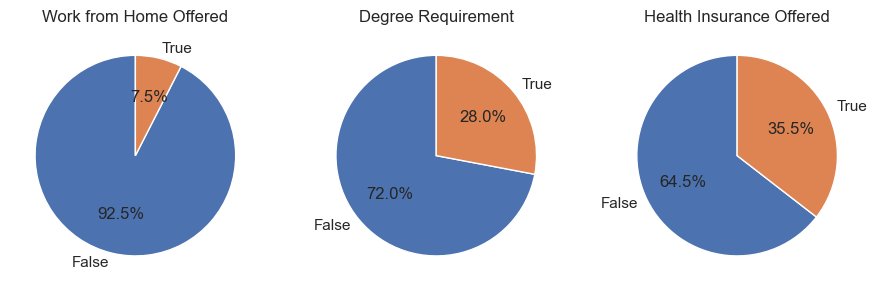

In [19]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

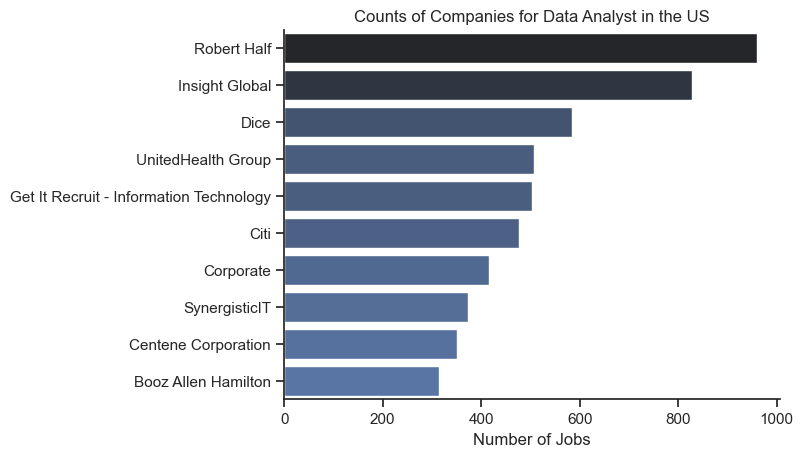

In [22]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

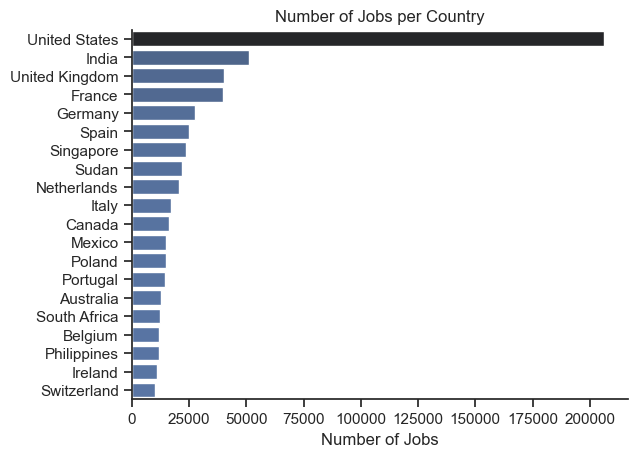

In [20]:
df_plot2 = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot2, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

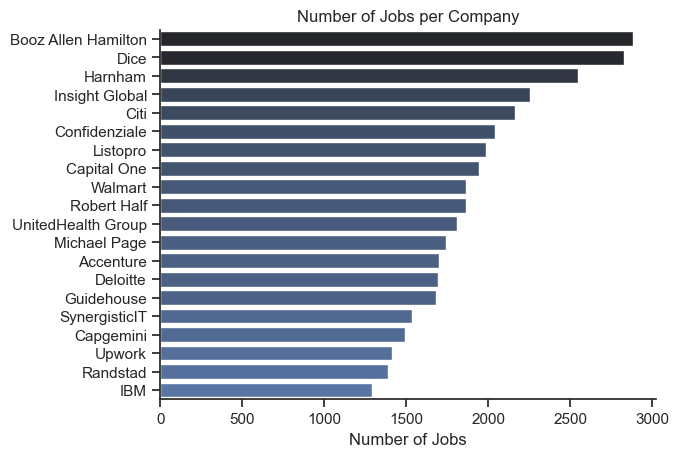

In [21]:
df_plot3 = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot3, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Filter for Poland Data Analyst roles

In [2]:
df_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')].copy()
df_PL

job_title_short                                      job_title  \
18        Data Analyst                                   Data Analyst   
584       Data Analyst                           Data Quality Analyst   
1263      Data Analyst  Data Analyst - Freelance - Portugal/UK/Poland   
1490      Data Analyst                                HR Data Analyst   
2269      Data Analyst                 Analityk Danych (Data Analyst)   
...                ...                                            ...   
784713    Data Analyst                       Data & Analytics Manager   
785012    Data Analyst                               CRM Data Analyst   
785052    Data Analyst                              Analityk Big Data   
785474    Data Analyst              Sustainable Sourcing Data Analyst   
785503    Data Analyst                Associate Director of Analytics   

          job_location                job_via job_schedule_type  \
18      Warsaw, Poland  via Praca Trabajo.org         Full-time   
584     Kraków, Poland           via LinkedIn         Full-time   
1263            Poland  via My Stateline Jobs        Contractor   
1490            Poland        via Ai-Jobs.net         Full-time   
2269    Warsaw, Poland       via The:Protocol         Full-time   
...                ...                    ...               ...   
784713  Warsaw, Poland  via Praca Trabajo.org         Full-time   
785012          Poland          via Adzuna.pl         Full-time   
785052  Kraków, Poland        via Trabajo.org         Full-time   
785474  Warsaw, Poland           via Linkedin         Full-time   
785503  Warsaw, Poland        via Trabajo.org         Full-time   

        job_work_from_home search_location     job_posted_date  \
18                   False          Poland 2023-10-16 13:36:54   
584                  False          Poland 2023-02-16 13:24:23   
1263                 False          Poland 2023-06-29 14:03:32   
1490                 False          Poland 2023-12-16 13:11:23   
2269                 False          Poland 2023-11-23 13:21:09   
...                    ...             ...                 ...   
784713               False          Poland 2023-04-25 06:23:30   
785012               False          Poland 2023-01-14 06:21:29   
785052               False          Poland 2023-01-17 06:57:43   
785474               False          Poland 2023-01-04 15:44:44   
785503               False          Poland 2023-01-17 06:57:42   

        job_no_degree_mention  job_health_insurance job_country salary_rate  \
18                      False                 False      Poland        None   
584                     False                 False      Poland        None   
1263                     True                 False      Poland        None   
1490                    False                 False      Poland        year   
2269                     True                 False      Poland        None   
...                       ...                   ...         ...         ...   
784713                   True                 False      Poland        None   
785012                  False                 False      Poland        None   
785052                   True                 False      Poland        None   
785474                   True                 False      Poland        None   
785503                  False                 False      Poland        None   

        salary_year_avg  salary_hour_avg                   company_name  \
18                  NaN              NaN                          Glovo   
584                 NaN              NaN                          Dyson   
1263                NaN              NaN     Global Enterprise Partners   
1490            43200.0              NaN  Westinghouse Electric Company   
2269                NaN              NaN               AASA POLSKA S.A.   
...                 ...              ...                            ...   
784713              NaN              NaN                 N

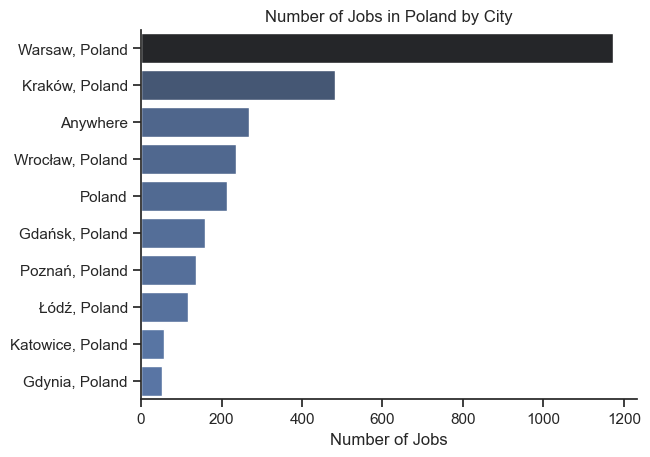

In [5]:
df_plot1 = df_PL['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot1, x='count', y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs in Poland by City')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

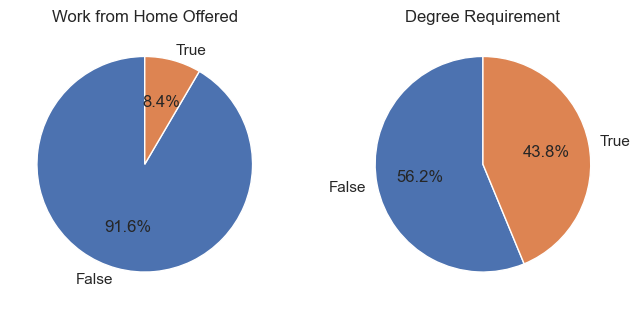

In [10]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
    
}

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_PL[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

In [21]:
df_PL_with_salary = df_PL[df_PL['salary_year_avg'].notna()]
df_PL_with_salary

job_title_short                                          job_title  \
1490      Data Analyst                                    HR Data Analyst   
6567      Data Analyst                           Data Analytics Assistant   
12745     Data Analyst                     Senior Clinical Data Manager I   
13825     Data Analyst                      Marketing Data Analyst [BGSW]   
19458     Data Analyst                   Customer Data Operations Analyst   
60007     Data Analyst                           Data Analyst with Python   
100026    Data Analyst                       Data Analyst/Custom Insights   
129506    Data Analyst                                       Data Analyst   
135608    Data Analyst                                  Data Analyst (BN)   
138321    Data Analyst        Data Analytics & Reporting, Support Analyst   
149682    Data Analyst                            Sr. People Data Analyst   
149963    Data Analyst       Analyst&Power BI Support, Data Visualization   
167828    Data Analyst                    Procurement Global Data Analyst   
189184    Data Analyst              Data Management and Reporting Analyst   
192615    Data Analyst                                Data Analyst - Risk   
262040    Data Analyst  Security Specialist for Azure Cloud Big Data P...   
316969    Data Analyst                                Junior Data Analyst   
344997    Data Analyst                                       Data Analyst   
398487    Data Analyst  Master Data Management Junior Administrator wi...   
404352    Data Analyst                                Data Analyst (S&OP)   
412234    Data Analyst                                    Data Analyst AC   
477281    Data Analyst                       Information Security Analyst   
504492    Data Analyst                             Data Analyst (CX Tech)   
536143    Data Analyst                                     Data Architect   
539406    Data Analyst                         Data Analyst - Allegro Pay   
544220    Data Analyst  Data Analyst (Delivery Experience Technology &...   
558811    Data Analyst                                       Data Analyst   
569650    Data Analyst                                People Data Analyst   
600771    Data Analyst  Data Analyst (Delivery Experience Technology &...   
621985    Data Analyst                               Data Analyst for MDM   
623369    Data Analyst                                       Data Analyst   
645902    Data Analyst                  Data Analyst - Financial Services   
673217    Data Analyst             Junior Data Analyst - e-Xperience 2023   
699192    Data Analyst                  Data Quality & Compliance Analyst   
703120    Data Analyst                Junior Data Analyst (Campaign Team)   
721352    Data Analyst               Data Analyst (Commercial Excellence)   
728241    Data Analyst                           SAP Finance Data Analyst   
738897    Data Analyst           Junior/Mid/Senior Data Analyst (Pricing)   
749878    Data Analyst  Junior Data Analyst (Młodszy Analityk Danych) ...   
758406    Data Analyst                             Data Analyst (Pricing)   
768093    Data Analyst                Cloud Data Administrator (Power BI)   
774165    Data Analyst                                Data Architect (BN)   
783448    Data Analyst    Data Analyst / Business Intelligence Specialist   

             job_location               job_via job_schedule_type  \
1490               Poland       via Ai-Jobs.net         Full-time   
6567       Warsaw, Poland       via Ai-Jobs.net         Full-time   
12745      Warsaw, Poland       via Ai-Jobs.net         Full-time   
13825      Warsaw, Poland       via Ai-Jobs.net         Full-time   
19458      Warsaw, Poland       via Ai-Jobs.net         Full-time   
60007      Kraków, Poland       via Ai-Jobs.net         Full-time   
100026     Kraków, Poland       via Ai-Jobs.net         Full-time   
129506     Warsaw, Poland       via Ai-Jobs.net         Full-time 

In [44]:
f'Ilość pozycji w Polsce w 2023r: {len(df_PL)}; Ilość pozycji z podanym wynagrodzeniem: {len(df_PL_with_salary)}'

'Ilość pozycji w Polsce w 2023r: 3172; Ilość pozycji z podanym wynagrodzeniem: 43'